# The Sparks Foundation

# Data Science & Business Analytics

# Narsapuram Vamshi Chary

# Task 2

# predict the optimum number of clusters and represent it visually

In [2]:
# let's import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[15,8]

In [3]:
#Data Preparation

In [4]:
# READ DATA

In [5]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data,columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#Let us now see the number of variables and observations in the data.

In [7]:
df.shape

(150, 4)

In [8]:
#Interpretation: The Dataset has 150 observation and 4 variables

In [9]:
# Check the data types

In [10]:
df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

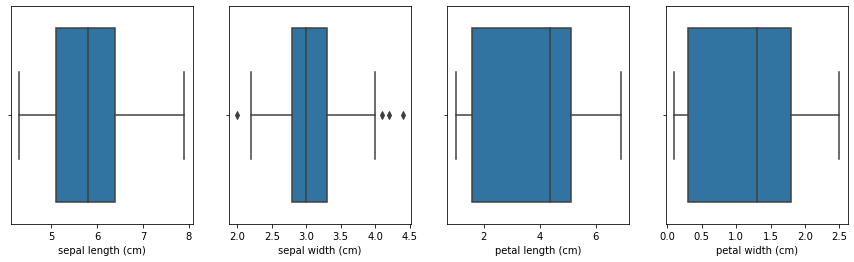

In [11]:
# plot the boxplot for each numerical variable.
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size

fig,ax = plt.subplots(nrows =1 ,ncols=4,figsize=(15,4))

# using for loop to plot the boxplot for each variable

for variable, subplot in zip(df.columns,ax.flatten()):
    # use boxplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.boxplot(df[variable],ax= subplot)
    
# display the plot

plt.show()

In [12]:
#Lets check Missing values

In [13]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [14]:
#Interpretation: The above output shows that thers is no missing values in the data

# K-Means Clustering


Let us perform the centroid-based clustering algorithm (i.e. K-Means). Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm.

Here we consider elbow plot to decide the optimal value of K to perform the K-means clustering.

# Optimal Value of K using elbow plot

Elbow plot is plotted with the value of K on the x-axis and the WCSS (Within Cluster Sum of Squares) on the y-axis. The value of K corresponding to the elbow point represents the optimal value for K.

In [15]:
from sklearn.cluster import KMeans

In [16]:
# create several cluster combinations ranging from 1 to 11 and observe the wcss
# (within the cluster sum of square) for each cluster
# consider an empty list to store the WCSS

wcss = []
# lets use for loop to perform K-Means with diffrent values of k
#set the random state to obtain the initial centroids in space  for each code run
# append the value of Wcss for each K to the list 'Wcss'
# the inertia_ returns the wcss for specific value of K
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Let's Plot the Elbow curve and find the optimal point

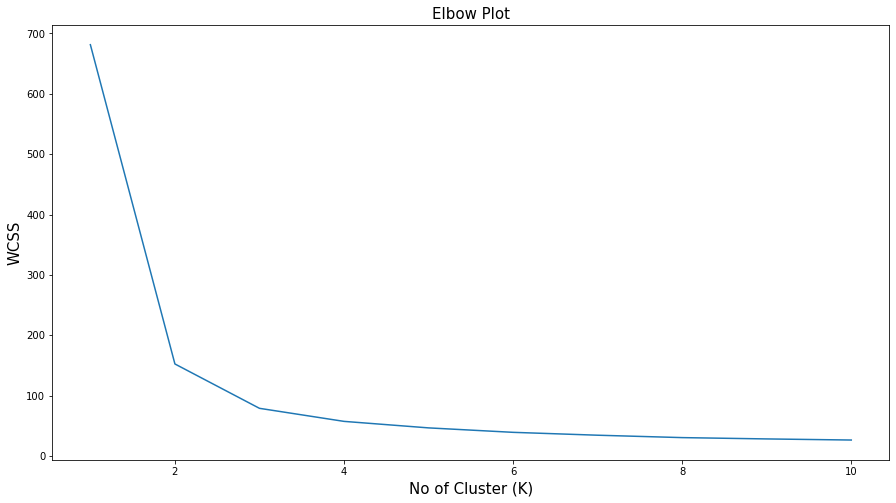

In [17]:
# visualize the elbow plot to get the optimal value of k
plt.plot(range(1,11),wcss)

# set the axis and plt labels

plt.title('Elbow Plot',fontsize = 15)
plt.xlabel('No of Cluster (K)',fontsize = 15)
plt.ylabel('WCSS',fontsize = 15)

# display the plt

plt.show()

Interpretation: We can see that the for K = 3, there is an elbow in the plot. Before this elbow point, the WCSS is decreasing rapidly and after K = 5, the WCSS is decreasing slowly

In [18]:
# Build the Model

In [19]:
# build a K-Means model with 3 clusters
new_clusters = KMeans(n_clusters = 3, random_state = 10)

# fit the model
new_clusters.fit(df)

# append the cluster label for each point in the dataframe 'df_cust'
df['Cluster'] = new_clusters.labels_

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Check the size of each cluster

In [21]:
df['Cluster'].value_counts()

1    62
0    50
2    38
Name: Cluster, dtype: int64

# Analyze the clusters

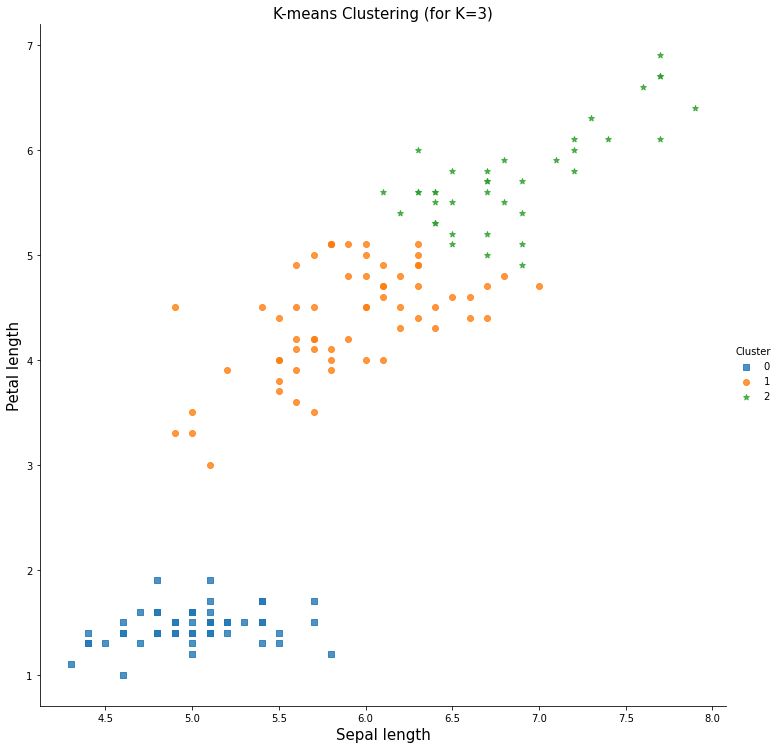

In [22]:
# plot the lmplot to visualize the clusters
# pass the different markers to display the points in each cluster with different shapes
# the 'hue' parameter returns colors for each cluster
sns.lmplot( x = 'sepal length (cm)', y = 'petal length (cm)',data =df, hue = 'Cluster', 
                markers = [',',  'o', '*'], fit_reg = False, size = 10)

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('K-means Clustering (for K=3)', fontsize = 15)
plt.xlabel('Sepal length', fontsize = 15)
plt.ylabel('Petal length', fontsize = 15)

# display the plot
plt.show()